## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [24]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [25]:
print(X.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [26]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 6, stratify = y) 

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [27]:
X_trainknn = X_train[['alcohol', 'magnesium']]
X_trainn = StandardScaler().fit_transform(X_trainknn)
X_train = pd.DataFrame(data=X_trainn)
X_train.head()

,0,1
0,0.831465,1.270909
1,-1.393135,-0.948707
2,0.733680,1.344897
3,-0.183050,-0.060860
4,-0.231943,-0.948707


In [28]:
X_testknn = X_test[['alcohol', 'magnesium']]
X_testn = StandardScaler().fit_transform(X_testknn)
X_test = pd.DataFrame(data=X_testn)
X_test.head()

,0,1
0,2.220974,-0.311403
1,1.235612,1.549883
2,-1.080627,-1.402502
3,-1.451738,-0.054674
4,0.979674,-1.017408


In [29]:
nl = [1, 3, 5, 10, 15, 25]
nll = []
for k in nl:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    nll.append(knn.fit(X_train, y_train))
    scoretrain = knn.score(X_train, y_train)
    scoretest = knn.score(X_test, y_test)
    print(f"k = {k}; Train = {scoretrain:.2f}; Test = {scoretest:2f}")

k = 1; Train = 0.99; Test = 0.629630
k = 3; Train = 0.84; Test = 0.666667
k = 5; Train = 0.81; Test = 0.648148
k = 10; Train = 0.77; Test = 0.740741
k = 15; Train = 0.73; Test = 0.666667
k = 25; Train = 0.70; Test = 0.703704


/Users/ivanovcharov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ivanovcharov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [12]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

/Users/ivanovcharov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ivanovcharov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

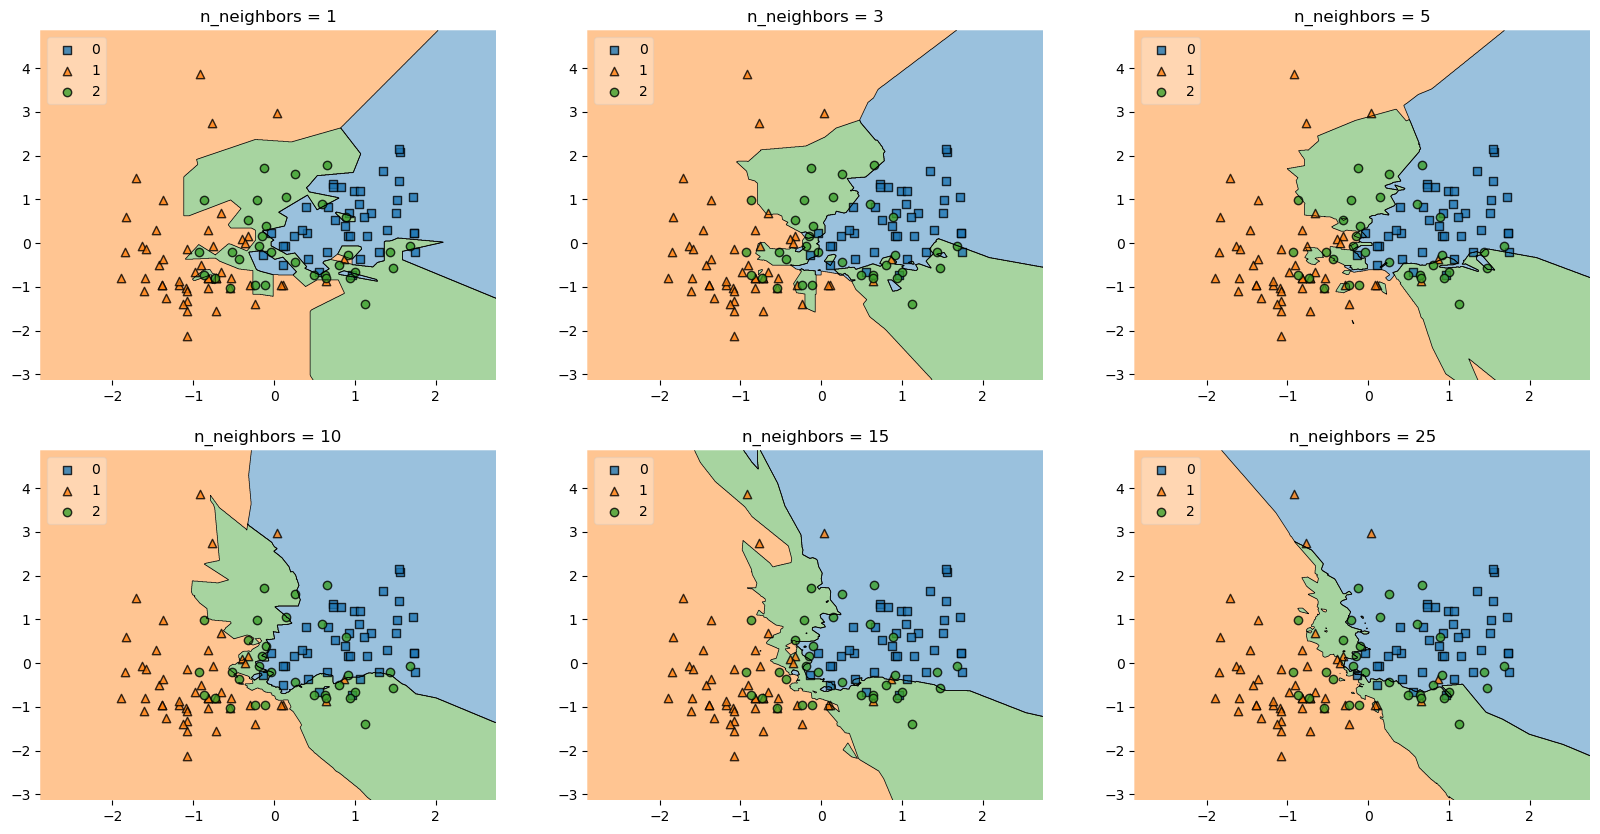

In [30]:
X_np = X_train.to_numpy()

fig = plt.figure(figsize = (20, 10))
gs = gridspec.GridSpec(2, 3, fig)

for i, knn in enumerate(nll):
    ax = plt.subplot(gs[i])
    plot_decision_regions(X_np, y_train, clf=knn, legend=2, ax=ax)
    ax.set_title(f'n_neighbors = {nl[i]}')

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Модель с k = 1 явно переобучена (на графике видно, что она слишком точно адаптировалась к тренировочным данным). Графики с моделями с k = 3 и k = 5 менее искривлены (что может говорить об итоговом более высоком уровне точности на тестовой выборке), однако и они переобучены. 
Графики с моделями с k = 15 и k = 25 скорее недообучены и поэтому нельзя говорить о том, что они будут оптимальными. 
А вот график k = 10 в данном случае представляет собой золотую середину: он и не так сильно искривлен, но и не гладок. Мой выбор подтверждает и выкладка из задания 1.3, где у k-10 самая высокая точность на тестовой выборке. 

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

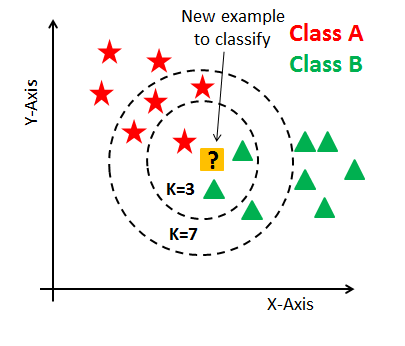

In [32]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass
    
    def predict2(self, X): #Еще одна функция для удобства
        dist = [self.count_distance(X, x_train) for x_train in self.X_train]
        # Берем k ближайших соседей и их метки
        k_nei = np.argsort(dist)[:self.k]
        knl = [self.y_train[i] for i in k_nei]
        # Выбираем самую частую метку
        most_common = Counter(knl).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        pr_labels = [self.predict2(i) for i in X]
        return np.array(pr_labels)

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

In [33]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [34]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [35]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [36]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [37]:
del data['Unnamed: 0']

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [38]:
datacorr = data.drop(['cut', 'color', 'clarity'], axis = 1)
datacorr.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Сильно коррелируют карат и размеры (потому что чем больше алмаз, тем он больше будет весить). А еще все это хорошо коррелирует с ценой: если алмаз большой (и по весу, и по размеру) он будет весить дороже. 

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
enc = OneHotEncoder(sparse=False)
encdata = enc.fit_transform(data[['cut', 'color', 'clarity']])
encdf = pd.DataFrame(encdata, columns = enc.get_feature_names_out())
data2 = pd.concat([data.drop(['cut', 'color', 'clarity'], axis = 1), encdf], axis = 1)
data2.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [40]:
y = data2['price']
X = data2.drop(['price'], axis = 1)

In [41]:
# Зачем параметр stratify? Мы же регрессией занимаемся...
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 6)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [42]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [44]:
regr = LinearRegression().fit(X_train, y_train)

print(f"Train: {mse(y_train, regr.predict(X_train))}")
print(f"Test: {mse(y_test, regr.predict(X_test))}")

Train: 1252396.3399280314
Test: 1333968.1187165824


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [45]:
regr.coef_

array([ 5.33614363e+03, -8.54077126e+01, -5.24885392e+01, -1.11823660e+03,
        7.26137983e+00, -5.35591286e+01, -1.22491511e+02, -4.05947513e+01,
        5.45223309e+01,  1.59487225e+01, -2.36981334e+00,  2.02208947e+02,
        1.64471461e+02,  1.34396701e+02,  6.19464664e+01, -1.21844345e+02,
       -2.54113424e+02, -3.85902574e+02, -4.62679188e+02,  2.29289736e+02,
       -1.43133440e+02, -4.92081992e+02,  2.01051481e+02,  1.09694449e+02,
        2.49879774e+02,  2.70495938e+02])

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [46]:
from sklearn.linear_model import Lasso, Ridge

In [47]:
lasso = Lasso(10).fit(X_train, y_train)
ridge = Ridge(10).fit(X_train, y_train)

In [48]:
print(ridge.coef_)

[ 5.29954902e+03 -8.11645688e+01 -5.22142223e+01 -1.06361277e+03
  6.53097840e+00 -7.19274225e+01 -1.22679940e+02 -4.07139930e+01
  5.45223511e+01  1.59029252e+01 -2.16141831e+00  2.01963738e+02
  1.64240315e+02  1.33961994e+02  6.16682134e+01 -1.21608411e+02
 -2.53445941e+02 -3.85173762e+02 -4.62270575e+02  2.29657727e+02
 -1.43651276e+02 -4.91950920e+02  2.00865934e+02  1.09536259e+02
  2.50365260e+02  2.70733387e+02]


In [49]:
print(lasso.coef_)

[ 4.89189942e+03 -5.13557810e+01 -3.89761821e+01 -6.53159134e+02
 -0.00000000e+00 -8.84525414e+01 -1.23000836e+02 -4.09343986e+01
  4.64979007e+01  0.00000000e+00 -4.37935808e-01  1.34474485e+02
  8.92238310e+01  5.93277451e+01 -0.00000000e+00 -1.69331799e+02
 -2.86098396e+02 -4.04807994e+02 -4.80290815e+02  1.75571998e+02
 -2.55104317e+02 -5.81671194e+02  9.45987009e+01 -0.00000000e+00
  1.78713211e+02  1.87333486e+02]


Если сравнить результаты изначальной и гребневой регрессии, то мы не видим сильных изменений в коэффициентах. Тем не менее в лассо-регрессии мы можем видеть нулевые коэффициенты, а значит проблема мультиколлинеарности в нашей регрессии все же есть. 

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [50]:
a = [0.1, 1, 10, 100, 200]
lasso = []
ridge = []
for x in a:
    lasso1 = Lasso(x).fit(X_train, y_train)
    lasso.append(np.linalg.norm(lasso1.coef_))
    ridge1 = Ridge(x).fit(X_train, y_train)
    ridge.append(np.linalg.norm(ridge1.coef_))

/Users/ivanovcharov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+08, tolerance: 5.975e+07
  model = cd_fast.enet_coordinate_descent(


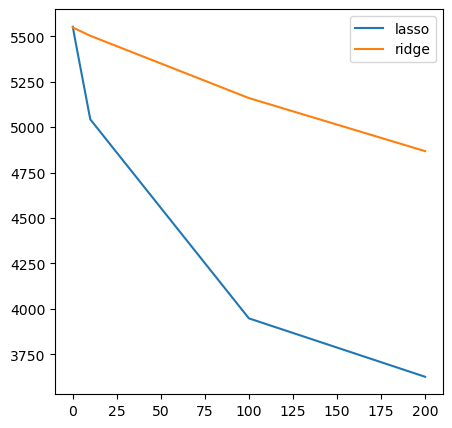

In [51]:
fig = plt.figure(figsize=(5, 5))
plt.plot(a, lasso, label='lasso')
plt.plot(a, ridge, label='ridge')
plt.legend()
plt.show()

На графике видно, что при увеличении параметра регуляризации Lasso-регрессия сильнее занижает норму весов. Ее используют для отбора признаков ровно из-за ее «агрессивности»: она способна полностью занулять коэффциенты признаков, в отличие от гребневой регрессии, которая их просто занижает. 

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [52]:
from sklearn.linear_model import LassoCV

In [53]:
LassoCV(alphas = a, cv = 5).fit(X_train, y_train).alpha_

1.0

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [54]:
lasso99 = Lasso(1).fit(X_train, y_train)
print(lasso99.coef_)

[ 5291.60860576   -82.15152205   -51.18773279 -1066.23031445
    -0.           -55.98543549  -128.21672231   -50.02945166
    37.656755       0.           -15.74693148   150.40421968
   104.44652516    74.96340568    -0.          -176.13183011
  -298.50566284  -418.11668277  -491.47879336   182.03515035
  -254.31472731  -589.62032147   106.9348745     -0.
   183.84090581   194.10528678]


Небольшой размер параметра регуляризации не сильно снизил оценки значимых коэффциентов, однако «занулил» (а значит признал неинформативными) переменную 'y', дамми-переменные 'cut_Premium' и 'clarity_VS2'. Наиболее информативными для цены оказался вес в каратах (что логично), размер (в одном измерении, что тоже логично, потому что алмазы мерят линейкой) и четкость (но не во всех случаях, скорее если уж есть включения и они не слабые, то это значительно отрицательно повлияет на цену).

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [55]:
print(f"Regr: {mse(y_test, regr.predict(X_test))}")
print(f"Lasso: {mse(y_test, lasso99.predict(X_test))}")

Regr: 1333968.1187165824
Lasso: 1334302.2904837343


В данном конкретном случае разница между значениями регрессий НАМНОГО меньше процента, поэтому допустимо использовать оба варианта. MSE у обычной регрессии чуть меньше (значит она чуть точнее), потому что, видимо lasso уменьшила (или обнулила) коэффициенты, которые очень немного объясняли y. Но опять же, разница крайне мала.